In [ ]:
# !pip install kagglehub

In [1]:
# 데이터 준비

import kagglehub

# Download latest version
path = kagglehub.dataset_download("mnassrib/jena-climate")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\human\.cache\kagglehub\datasets\mnassrib\jena-climate\versions\1


In [2]:
# 데이터 준비

!dir C:\Users\human\.cache\kagglehub\datasets\mnassrib\jena-climate\versions\1

!copy C:\Users\human\.cache\kagglehub\datasets\mnassrib\jena-climate\versions\1\* data-files\

 C ����̺��� �������� �̸��� �����ϴ�.
 ���� �Ϸ� ��ȣ: DFF3-B27A

 C:\Users\human\.cache\kagglehub\datasets\mnassrib\jena-climate\versions\1 ���͸�

2024-12-16  ���� 05:16    <DIR>          .
2024-12-16  ���� 05:16    <DIR>          ..
2024-12-16  ���� 05:16        43,164,220 jena_climate_2009_2016.csv
               1�� ����          43,164,220 ����Ʈ
               2�� ���͸�  39,529,394,176 ����Ʈ ����
C:\Users\human\.cache\kagglehub\datasets\mnassrib\jena-climate\versions\1\jena_climate_2009_2016.csv
        1�� ������ ����Ǿ����ϴ�.


In [3]:
# 데이터 확인

with open('data-files/jena_climate_2009_2016.csv') as f:
    data = f.readlines()

print( data[0] )
print( data[1] )

del data # 변수를 메모리에서 제거

"Date Time","p (mbar)","T (degC)","Tpot (K)","Tdew (degC)","rh (%)","VPmax (mbar)","VPact (mbar)","VPdef (mbar)","sh (g/kg)","H2OC (mmol/mol)","rho (g/m**3)","wv (m/s)","max. wv (m/s)","wd (deg)"

01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.30,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.30



In [4]:
import pandas as pd

# 데이터 읽기
jena_climate = pd.read_csv('data-files/jena_climate_2009_2016.csv')

In [5]:
jena_climate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420551 entries, 0 to 420550
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Date Time        420551 non-null  object 
 1   p (mbar)         420551 non-null  float64
 2   T (degC)         420551 non-null  float64
 3   Tpot (K)         420551 non-null  float64
 4   Tdew (degC)      420551 non-null  float64
 5   rh (%)           420551 non-null  float64
 6   VPmax (mbar)     420551 non-null  float64
 7   VPact (mbar)     420551 non-null  float64
 8   VPdef (mbar)     420551 non-null  float64
 9   sh (g/kg)        420551 non-null  float64
 10  H2OC (mmol/mol)  420551 non-null  float64
 11  rho (g/m**3)     420551 non-null  float64
 12  wv (m/s)         420551 non-null  float64
 13  max. wv (m/s)    420551 non-null  float64
 14  wd (deg)         420551 non-null  float64
dtypes: float64(14), object(1)
memory usage: 48.1+ MB


In [6]:
jena_climate.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


In [7]:
# features = jena_climate.drop(['Date Time', 'T (degC)'], axis=1)
features = jena_climate.drop(jena_climate.columns[[0, 2]], axis=1)  # --> X
# temperature = jena_climate['T (degC)']
temperature = jena_climate[jena_climate.columns[2]] # --> y

In [8]:
features.shape, temperature.shape

((420551, 13), (420551,))

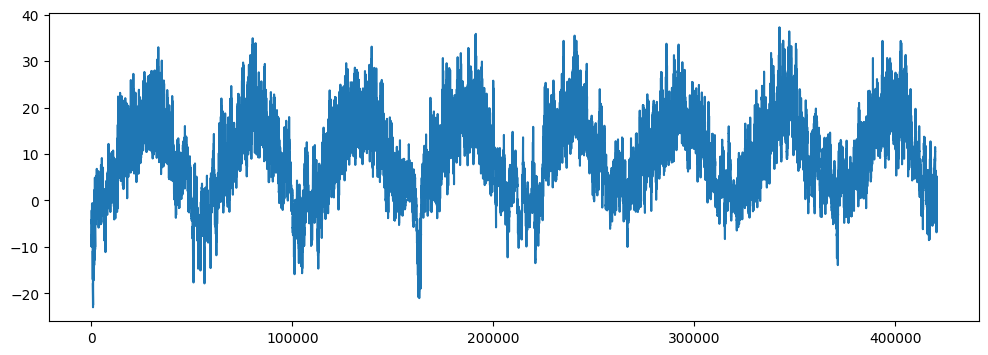

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.plot(temperature)
plt.show()

In [10]:
print( temperature.min(), temperature.max() )
min_mask = jena_climate['T (degC)'] == temperature.min()
max_mask = jena_climate['T (degC)'] == temperature.max()
jena_climate[min_mask | max_mask]

-23.01 37.28


,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
882,07.01.2009 03:10:00,993.67,-23.01,250.60,-25.01,83.40,0.95,0.79,0.16,0.50,0.80,1383.38,0.80,1.5,137.6
342323,04.07.2015 16:00:00,991.42,37.28,311.21,15.61,27.85,63.77,17.76,46.01,11.22,17.91,1104.99,1.73,5.0,147.4


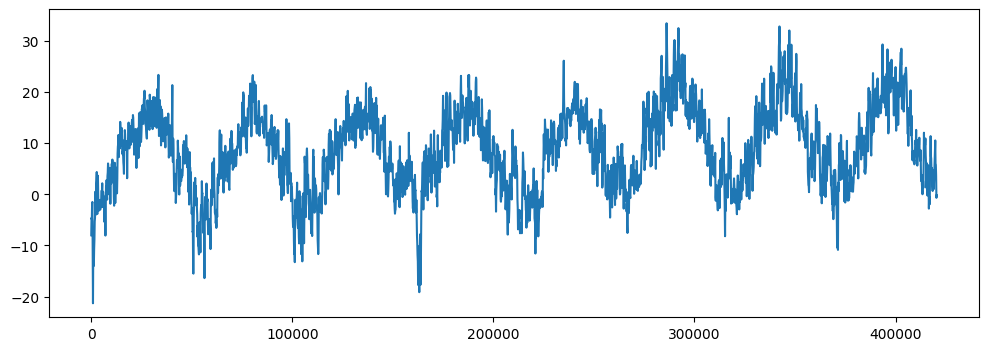

In [11]:
plt.figure(figsize=(12, 4))
plt.plot(temperature[::6*24]) # 1일 단위 데이터  시각화
plt.show()

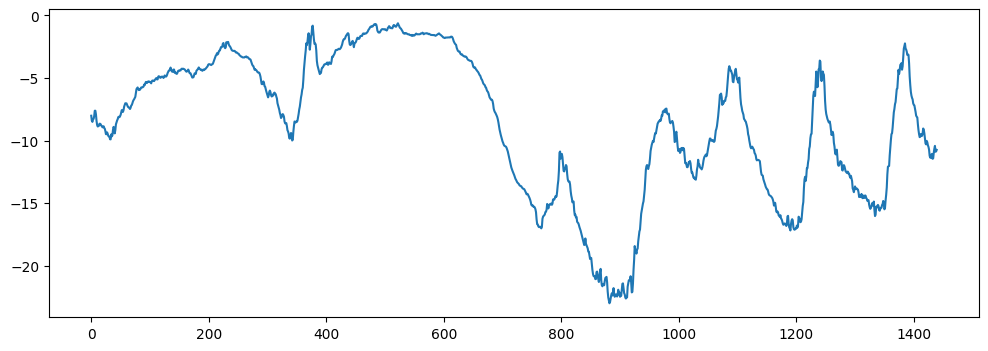

In [12]:
plt.figure(figsize=(12, 4))
plt.plot(temperature[:6*24*10]) # 처음 10일간의 데이터 시각화
plt.show()

In [13]:
import tensorflow as tf
from tensorflow import keras as tf_keras

In [15]:
print( tf.__version__)

2.15.0


In [16]:
# 모델 구조 설계 1 : 완전 연결망 (Dense)

model1 = tf_keras.models.Sequential([
    tf_keras.layers.Input(shape=(features.shape[1],)),
    tf_keras.layers.Dense(units=128, activation='relu'),
    tf_keras.layers.Dense(units=64, activation='relu'),
    tf_keras.layers.Dense(units=1) # 회귀 모델인 경우 출력층 유닛 갯수는 1, 활성함수는 None(항등함수효과)
])

In [17]:
# 모델 학습 설계 1

model1.compile(loss='mse', optimizer='adam', metrics=['mae'])

In [18]:
# 훈련 1. 당일 데이터로 당일 기온 예측 ( 예측 불가능 모델 )
# model1.fit(features[::6*24], temperature[::6*24],
#            epochs=10, batch_size=64, validation_split=0.2)

# 훈련 1. 전일 데이터로 당일 기온 예측
# numpy_array[시작:끝:스텝]
fit_history1 = model1.fit(features[:-6*24:6*24], temperature[6*24::6*24],
                          epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10


37/37 [==============================] - 1s 8ms/step - loss: 253.5046 - mae: 11.9743 - val_loss: 2313.3142 - val_mae: 6.5937
Epoch 2/10
37/37 [==============================] - 0s 3ms/step - loss: 20.8864 - mae: 3.5368 - val_loss: 3005.2620 - val_mae: 5.1573
Epoch 3/10
37/37 [==============================] - 0s 3ms/step - loss: 12.1607 - mae: 2.7325 - val_loss: 3631.6121 - val_mae: 5.4705
Epoch 4/10
37/37 [==============================] - 0s 3ms/step - loss: 12.8223 - mae: 2.8262 - val_loss: 4199.7534 - val_mae: 5.5285
Epoch 5/10
37/37 [==============================] - 0s 3ms/step - loss: 13.3696 - mae: 2.9099 - val_loss: 4505.5771 - val_mae: 5.5501
Epoch 6/10
37/37 [==============================] - 0s 3ms/step - loss: 11.5702 - mae: 2.6532 - val_loss: 4838.8989 - val_mae: 6.0549
Epoch 7/10
37/37 [==============================] - 0s 3ms/step - loss: 11.3706 - mae: 2.6297 - val_loss: 5111.8784 - val_mae: 6.0058
Epoch 8/10
37/37 [==============================] - 0s 3ms

In [19]:
model1.evaluate(features[:-6*24:6*24], temperature[6*24::6*24])

92/92 [==============================] - 0s 1ms/step - loss: 1125.1184 - mae: 3.2570


[1125.118408203125, 3.2570440769195557]

In [20]:
# 1시간 단위의 이전 10일 데이터를 사용해서 다음날 기온 예측

jena_climate_per_hour = jena_climate.iloc[::6, :].copy() # step : 6 --> 1시간 단위 데이터

In [21]:
jena_climate_per_hour.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
6,01.01.2009 01:10:00,996.50,-7.62,265.81,-8.30,94.8,3.44,3.26,0.18,2.04,3.27,1305.68,0.18,0.63,166.5
12,01.01.2009 02:10:00,996.63,-8.85,264.57,-9.70,93.5,3.12,2.92,0.20,1.82,2.93,1312.11,0.16,0.50,158.3
18,01.01.2009 03:10:00,996.87,-8.84,264.56,-9.69,93.5,3.13,2.92,0.20,1.83,2.93,1312.37,0.07,0.25,129.3
24,01.01.2009 04:10:00,997.05,-9.23,264.15,-10.25,92.2,3.03,2.79,0.24,1.74,2.80,1314.62,0.10,0.38,203.9


In [23]:
jena_climate_per_hour.iloc[:240:240, :]
jena_climate_per_hour.iloc[1:241:240, :]
jena_climate_per_hour.iloc[2:242:240, :]

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
12,01.01.2009 02:10:00,996.63,-8.85,264.57,-9.7,93.5,3.12,2.92,0.2,1.82,2.93,1312.11,0.16,0.5,158.3


In [23]:
days = 10   # 10일
stride = 6  # 한 시간 단위 ( 몇 개 마다 데이터를 뽑을지 결정 )
delay = (days + 0) * stride * 24 # 입력 시퀀스(리스트) 크기 (범위) --> 여기서는 10일 (갯수로는 1440)

In [24]:
# 훈련, 검증, 테스트 데이터 범위

print( features.shape[0] * 0.8 ) # 훈련데이터
print( features.shape[0] * 0.8 * 0.8 ) # 검증데이터

336440.80000000005
269152.6400000001


In [25]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

features2 = StandardScaler().fit_transform(features)
features3 = MinMaxScaler().fit_transform(features)

In [26]:
# 데이터 셋 만들기 1
train_dataset = tf_keras.utils.timeseries_dataset_from_array(
    data=features[:-delay], # 전체 기간 중에서 마지막 11일치의 데이터는 제외
    targets=temperature[delay:],
    sequence_length=24 * days,
    sampling_rate=stride,
    start_index=0,
    end_index=270000,
    batch_size=32,
    shuffle=True,
)
validation_dataset = tf_keras.utils.timeseries_dataset_from_array(
    data=features[:-delay], # 전체 기간 중에서 마지막 11일치의 데이터는 제외
    targets=temperature[delay:],
    sequence_length=24 * days,
    sampling_rate=stride,
    start_index=270000,
    end_index=330000,
    batch_size=32,
    shuffle=True,
)
test_dataset = tf_keras.utils.timeseries_dataset_from_array(
    data=features[:-delay], # 전체 기간 중에서 마지막 11일치의 데이터는 제외
    targets=temperature[delay:],
    sequence_length=24 * days,
    sampling_rate=stride,
    start_index=330000,
    batch_size=32,
    shuffle=True,
)

In [27]:
# 데이터 셋 만들기 2

datasets = []
for sidx, eidx in zip([0, 270000, 330000], [270000, 330000, None]):
  dataset = tf_keras.utils.timeseries_dataset_from_array(
    data=features[:-delay], # 전체 기간 중에서 마지막 11일치의 데이터는 제외
    targets=temperature[delay:],
    sequence_length=24 * days,
    sampling_rate=stride,
    start_index=sidx,
    end_index=eidx,
    batch_size=32,
    shuffle=True)
  datasets.append(dataset)

In [28]:
for X, y in train_dataset:
  print(X.shape, y.shape)
  break

for X, y in datasets[0]:
  print(X.shape, y.shape)
  break

(32, 240, 13) (32,)
(32, 240, 13) (32,)


In [30]:
import numpy as np
np.set_printoptions(suppress=True) # 지수 표기법을 사용하지 않도록 설정

In [31]:
# 데이터셋 구성 확인
for X, y in train_dataset: # 32개의 데이터 반환
  print(X[0, -1, :5])
  print(y[0]) # X는 1440(1439)번째 데이터,y는 1441(1440)번째 데이터
  break
print(jena_climate.iloc[1440 - 6:1440, :7])

tf.Tensor([991.75 289.7    9.66  66.62  18.04], shape=(5,), dtype=float64)
tf.Tensor(14.51, shape=(), dtype=float64)
                Date Time  p (mbar)  T (degC)  Tpot (K)  Tdew (degC)  rh (%)  \
1434  10.01.2009 23:10:00   1002.72    -10.98    261.98       -11.88    93.0   
1435  10.01.2009 23:20:00   1002.76    -10.66    262.29       -11.60    92.7   
1436  10.01.2009 23:30:00   1002.74    -10.43    262.52       -11.39    92.6   
1437  10.01.2009 23:40:00   1002.74    -10.90    262.05       -12.02    91.4   
1438  10.01.2009 23:50:00   1002.76    -10.87    262.08       -11.86    92.3   
1439  11.01.2009 00:00:00   1002.72    -10.75    262.21       -11.76    92.2   

      VPmax (mbar)  
1434          2.64  
1435          2.70  
1436          2.75  
1437          2.65  
1438          2.66  
1439          2.69  


In [32]:
# 모델 구조 설계 2 : 완전 연결망
model2 = tf_keras.models.Sequential([
    tf_keras.layers.Input(shape=(240, 13)), # 시계열 데이터를
    tf_keras.layers.Flatten(),              # 비시계열 데이터로 변경
    tf_keras.layers.Dense(units=128, activation='relu'),
    tf_keras.layers.Dense(units=64, activation='relu'),
    tf_keras.layers.Dense(units=1)
])
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3120)              0         
                                                                 
 dense_3 (Dense)             (None, 128)               399488    
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 407809 (1.56 MB)
Trainable params: 407809 (1.56 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [33]:
# 모델 학습 설계 2
model2.compile(loss='mse', optimizer='adam', metrics=['mae'])

In [34]:
model2.fit(datasets[0], epochs=10, validation_data=datasets[1])

Epoch 1/10
8393/8393 [==============================] - 47s 6ms/step - loss: 562.9315 - mae: 4.9822 - val_loss: 7.7627 - val_mae: 2.3582
Epoch 2/10
8393/8393 [==============================] - 53s 6ms/step - loss: 58.9791 - mae: 5.4701 - val_loss: 55.4629 - val_mae: 6.1752
Epoch 3/10
8393/8393 [==============================] - 49s 6ms/step - loss: 74.3732 - mae: 7.0381 - val_loss: 55.5017 - val_mae: 6.1767
Epoch 4/10
8393/8393 [==============================] - 47s 6ms/step - loss: 74.3780 - mae: 7.0382 - val_loss: 55.3895 - val_mae: 6.1725
Epoch 5/10
8393/8393 [==============================] - 47s 6ms/step - loss: 74.3793 - mae: 7.0383 - val_loss: 55.5047 - val_mae: 6.1768
Epoch 6/10
8393/8393 [==============================] - 46s 5ms/step - loss: 74.3792 - mae: 7.0382 - val_loss: 55.5263 - val_mae: 6.1775
Epoch 7/10
8393/8393 [==============================] - 49s 6ms/step - loss: 74.3793 - mae: 7.0383 - val_loss: 55.5413 - val_mae: 6.1781
Epoch 8/10
8393/8393 [===================

In [35]:
model2.evaluate(datasets[2])

2740/2740 [==============================] - 7s 3ms/step - loss: 910.7639 - mae: 9.3751


[910.763916015625, 9.375123023986816]

In [36]:
# 모델 구조 설계 3 : 순환 신경망 모델

input = tf_keras.layers.Input(shape=(240, 13))
x = tf_keras.layers.SimpleRNN(units=16)(input) # activate 지정 X
output = tf_keras.layers.Dense(units=1)(x)

model3 = tf_keras.models.Model(input, output)

model3.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 240, 13)]         0         
                                                                 
 simple_rnn (SimpleRNN)      (None, 16)                480       
                                                                 
 dense_6 (Dense)             (None, 1)                 17        
                                                                 
Total params: 497 (1.94 KB)
Trainable params: 497 (1.94 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [37]:
# 모델 학습 설계 3 :

model3.compile(loss='mse', optimizer='adam', metrics=['mae'])

In [38]:
# 모델 훈련 3
model3.fit(datasets[0], epochs=10, validation_data=datasets[1])

Epoch 1/10


8393/8393 [==============================] - 237s 28ms/step - loss: 41.1123 - mae: 4.8198 - val_loss: 16.3316 - val_mae: 3.1924
Epoch 2/10
8393/8393 [==============================] - 231s 27ms/step - loss: 24.5266 - mae: 3.9499 - val_loss: 17.2234 - val_mae: 3.3404
Epoch 3/10
8393/8393 [==============================] - 229s 27ms/step - loss: 24.4117 - mae: 3.9542 - val_loss: 17.2746 - val_mae: 3.3433
Epoch 4/10
8393/8393 [==============================] - 230s 27ms/step - loss: 24.3353 - mae: 3.9480 - val_loss: 21.5776 - val_mae: 3.6693
Epoch 5/10
8393/8393 [==============================] - 230s 27ms/step - loss: 24.2993 - mae: 3.9451 - val_loss: 16.9590 - val_mae: 3.3122
Epoch 6/10
8393/8393 [==============================] - 231s 28ms/step - loss: 24.2265 - mae: 3.9383 - val_loss: 18.8795 - val_mae: 3.4657
Epoch 7/10
8393/8393 [==============================] - 232s 28ms/step - loss: 24.0505 - mae: 3.9236 - val_loss: 25.4492 - val_mae: 3.9666
Epoch 8/10
8393/8393 [================

In [39]:
model3.evaluate(datasets[2])

2740/2740 [==============================] - 23s 8ms/step - loss: 14.0569 - mae: 2.8384


[14.05685806274414, 2.83837628364563]

In [40]:
# 모델 구조 설계 4 : LSTM

input = tf_keras.layers.Input(shape=(240, 13))
x = tf_keras.layers.LSTM(units=16)(input)
output = tf_keras.layers.Dense(units=1)(x)

model4 = tf_keras.models.Model(input, output)

model4.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 240, 13)]         0         
                                                                 
 lstm (LSTM)                 (None, 16)                1920      
                                                                 
 dense_7 (Dense)             (None, 1)                 17        
                                                                 
Total params: 1937 (7.57 KB)
Trainable params: 1937 (7.57 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [41]:
# 모델 학습 설계 4

model4.compile(loss='mse', optimizer='adam', metrics=['mae'])

In [42]:
fit_history4 = model4.fit(datasets[0], epochs=10, validation_data=datasets[1])

Epoch 1/10


8393/8393 [==============================] - 409s 48ms/step - loss: 65.7389 - mae: 6.2002 - val_loss: 28.6401 - val_mae: 4.0001
Epoch 2/10
8393/8393 [==============================] - 400s 48ms/step - loss: 32.2412 - mae: 3.9763 - val_loss: 13.4225 - val_mae: 2.4188
Epoch 3/10
8393/8393 [==============================] - 414s 49ms/step - loss: 17.3654 - mae: 2.6982 - val_loss: 6.7594 - val_mae: 1.6455
Epoch 4/10
8393/8393 [==============================] - 425s 51ms/step - loss: 9.8354 - mae: 1.9868 - val_loss: 4.1612 - val_mae: 1.3367
Epoch 5/10
8393/8393 [==============================] - 425s 51ms/step - loss: 6.4394 - mae: 1.6445 - val_loss: 4.6979 - val_mae: 1.6620
Epoch 6/10
8393/8393 [==============================] - 426s 51ms/step - loss: 4.9960 - mae: 1.4959 - val_loss: 3.3398 - val_mae: 1.3314
Epoch 7/10
8393/8393 [==============================] - 441s 53ms/step - loss: 4.3815 - mae: 1.4386 - val_loss: 3.1248 - val_mae: 1.3022
Epoch 8/10
8393/8393 [=========================

In [43]:
model4.evaluate(datasets[2])

2740/2740 [==============================] - 43s 16ms/step - loss: 3.6209 - mae: 1.3351


[3.6209399700164795, 1.3351093530654907]

In [57]:
# 모델 구조 설계 5 : CNN을 사용해서 순환 신경망 모방 모델 

from tensorflow.keras.layers import Conv1D, MaxPool1D, GlobalAvgPool1D
from tensorflow.keras.layers import Input, Flatten, Dense

input = Input(shape=(240, 13))
x = Conv1D(filters=16, kernel_size=24, activation="relu", padding="same")(input)
x = MaxPool1D(pool_size=2)(x)
x = Conv1D(filters=16, kernel_size=12, activation="relu", padding="same")(x)
x = MaxPool1D(pool_size=2)(x)
x = Conv1D(filters=16, kernel_size=6, activation="relu", padding="same")(x)
x = MaxPool1D(pool_size=2)(x)         
# x = Flatten()(x)              # (None, 480)
x = GlobalAvgPool1D()(x)        # (None, 16)
output = Dense(1)(x)
model5 = tf_keras.models.Model(input, output)

model5.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 240, 13)]         0         
                                                                 
 conv1d_18 (Conv1D)          (None, 240, 16)           5008      
                                                                 
 max_pooling1d_16 (MaxPooli  (None, 120, 16)           0         
 ng1D)                                                           
                                                                 
 conv1d_19 (Conv1D)          (None, 120, 16)           3088      
                                                                 
 max_pooling1d_17 (MaxPooli  (None, 60, 16)            0         
 ng1D)                                                           
                                                                 
 conv1d_20 (Conv1D)          (None, 60, 16)            1552

In [58]:
# 모델 학습 설계 5

model5.compile(loss='mse', optimizer='adam', metrics=['mae'])

In [59]:
fit_history5 = model5.fit(datasets[0], epochs=10, validation_data=datasets[1])

Epoch 1/10
8393/8393 [==============================] - 73s 9ms/step - loss: 12.6408 - mae: 1.4789 - val_loss: 1.8546 - val_mae: 1.1425
Epoch 2/10
8393/8393 [==============================] - 77s 9ms/step - loss: 0.7966 - mae: 0.6592 - val_loss: 0.9227 - val_mae: 0.7401
Epoch 3/10
8393/8393 [==============================] - 79s 9ms/step - loss: 0.7040 - mae: 0.6095 - val_loss: 0.7954 - val_mae: 0.6720
Epoch 4/10
8393/8393 [==============================] - 72s 9ms/step - loss: 0.6612 - mae: 0.5849 - val_loss: 0.6171 - val_mae: 0.5581
Epoch 5/10
8393/8393 [==============================] - 72s 9ms/step - loss: 0.6398 - mae: 0.5736 - val_loss: 0.6027 - val_mae: 0.5444
Epoch 6/10
8393/8393 [==============================] - 74s 9ms/step - loss: 0.6183 - mae: 0.5619 - val_loss: 0.5781 - val_mae: 0.5326
Epoch 7/10
8393/8393 [==============================] - 74s 9ms/step - loss: 0.6089 - mae: 0.5556 - val_loss: 0.5726 - val_mae: 0.5278
Epoch 8/10
8393/8393 [==============================] 

In [60]:
model5.evaluate(datasets[2])

2740/2740 [==============================] - 12s 4ms/step - loss: 258.0229 - mae: 2.0756


[258.02288818359375, 2.0756468772888184]